In [27]:
from pre_processing import Pre_Process
from LDA import LDA,GensimLDA,LDA_DOCS
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
QA=Pre_Process('../business_text_mining/crawl_result/wineQ&A_text.json').clean_data()

In [3]:
D=Pre_Process().Check_date(QA)
print('VAR',D.var())
import chart_studio.plotly.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
layout1 = cf.Layout(
    height=500,
    width=1000
)
#D.iplot(kind='bar',colors='Red',layout=layout1)

VAR 45.29108991422661


In [4]:
Pre_Process().show_contents_length(QA)

Ïª®ÌÖêÏ∏†Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : 2011
Ïª®ÌÖêÏ∏†Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 162.82191590086327


In [5]:
QA=Pre_Process().Get_unique_nouns(QA)

training was done. used memory 0.393 Gbry 0.263 Gb
all cohesion probabilities was computed. # words = 59465
all branching entropies was computed # words = 39925
all accessor variety was computed # words = 39925


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7182/7182 [00:04<00:00, 1623.35it/s]


0     1
91       ÏóÜÎã§  1378
454      Ïã∏Îã§  1207
129      Í∞ÄÍ≤©  1106
107     Í¥úÏ∞ÆÎã§  1042
221      Ï∂îÏ≤ú  1026
...     ...   ...
4774  ÎùºÌÅ¨ÎùºÏÇ¨Îìú    29
3937    ÎπÑÎπÑÎã§    29
3621    ÎìúÏÖîÎ≥¥    29
930      ÎåÄÎûµ    29
1241     Îã¥Îã§    29

[600 rows x 2 columns]

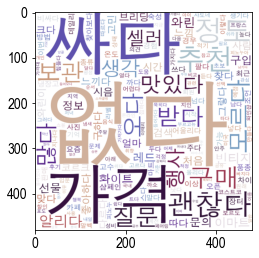

In [6]:
Pre_Process().Get_Nouns_Freq(QA,600,True)

In [17]:
import re
def get_text_with_word(word):
    l=re.findall('(„Ö†„Ö†)',word)
    L=re.findall('(„Öú„Öú)',word)
    i=re.findall('(\?\?)',word)
    return len(l)+len(i)+len(L)

In [18]:
QA['pain']=QA.contents.apply(lambda x :'pain' if get_text_with_word(x) != 0 else '')
PAIN=QA[QA.pain!='']

In [19]:
PAIN=QA[QA.pain!='']

0    1
236    ÏóÜÎã§  471
177   Í¥úÏ∞ÆÎã§  324
422    Ïã∏Îã§  323
35     Ï†ïÎèÑ  300
59     Ï∂îÏ≤ú  270
...   ...  ...
204    ÌòºÏûê   20
1460   ÌîºÎÖ∏   20
607    ÎßàÍ∞ú   20
10     ÎπºÎã§   20
1575   ÏÑ∏Í≥Ñ   20

[300 rows x 2 columns]

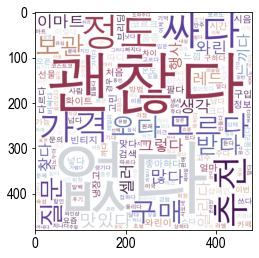

In [20]:
Pre_Process().Get_Nouns_Freq(PAIN,300,True)

# LDA

In [29]:
QA,topic_df=LDA_DOCS(QA,3)
_,lda,_=LDA(QA,3)

Topic 0
Î∞õÎã§,ÏÑ†Î¨º,ÏΩîÎ•¥ÌÅ¨,Î≥¥Í¥Ä,Î∏åÎ¶¨Îî©,Îî∞Îã§,Î™®Î•¥Îã§,Ïò§Îã§,ÏãúÍ∞Ñ,Ïù¥ÏÉÅ,ÏßàÎ¨∏,Ï≤òÏùå,Ïò§Ìîà,Ï†ïÎèÑ,Îã§Î•¥Îã§,ÏóÜÎã§,ÏôÄÎ¶∞,ÏÇ¨ÏßÑ,ÎßûÎã§,ÏÖÄÎü¨
Topic 1
Í∞ÄÍ≤©,Ïã∏Îã§,Í¥úÏ∞ÆÎã§,ÌñâÏÇ¨,ÏóÜÎã§,Î¨∏Ïùò,Íµ¨Îß§,ÎπàÌã∞ÏßÄ,Íµ¨ÌïòÎã§,Ï†ïÎ≥¥,Ï†ïÎèÑ,ÏÇ¨Îûå,Íµ¨ÏûÖ,Í∞ÄÎä•,ÌåêÎß§,ÌåîÎã§,Ï∞æÎã§,ÏÖÄÎü¨,ÏñºÎßà,Î≥¥Í¥Ä
Topic 2
Ï∂îÏ≤ú,Ïù¥ÎßàÌä∏,Ïñ¥Ïö∏Î¶¨Îã§,ÌôîÏù¥Ìä∏,ÏãúÏùå,Î†àÎìú,Ï¢ãÏïÑÌïòÎã§,ÏïåÎ¶¨Îã§,ÎßõÏûàÎã§,ÏóÜÎã§,ÏÉ¥ÌéòÏù∏,Í¥úÏ∞ÆÎã§,Í∞ÄÍ≤©,ÎßàÌä∏,ÌíàÏ¢Ö,Ïû•ÌÑ∞,Ïù¥Î≤à,Í≥†ÎØº,ÎßêÎã§,Ï∞®Ïù¥
Topic 0
Î≥¥Í¥Ä,ÌôîÏù¥Ìä∏,Î†àÎìú,ÏÖÄÎü¨,ÏΩîÎ•¥ÌÅ¨,ÏÉ¥ÌéòÏù∏,ÏóÜÎã§,Ïñ¥Ïö∏Î¶¨Îã§,ÎäêÎÅºÎã§,ÏôÄÎ¶∞Ïù¥,ÌíàÏ¢Ö,ÎäêÎÇå,Î™®Î•¥Îã§,Ï†ïÎèÑ,ÎÉâÏû•Í≥†,ÏßàÎ¨∏,Ïì∞Îã§,Í∑∏Î†áÎã§,Ï∂îÏ≤ú,Ï¢ãÏïÑÌïòÎã§
Topic 1
Ï∂îÏ≤ú,Î∞õÎã§,Ïã∏Îã§,ÌñâÏÇ¨,ÏóÜÎã§,ÏÑ†Î¨º,Í¥úÏ∞ÆÎã§,Ï†ïÎ≥¥,Ïò§Îã§,Í∞ÄÍ≤©,Í≤ÄÏÉâ,Ï∞æÎã§,ÌåîÎã§,Î™®Î•¥Îã§,Ïù¥ÎßàÌä∏,ÏÇ¨Îûå,ÌåêÎß§,ÎßéÎã§,ÎßàÌä∏,Ï£ºÎã§
Topic 2
Í∞ÄÍ≤©,Íµ¨Îß§,Ï†ïÎèÑ,Î∏åÎ¶¨Îî©,Î¨∏Ïùò,ÏãúÏùå,Ïã∏Îã§,Í¥úÏ∞ÆÎã§,ÏïåÎ¶¨Îã§,ÎπàÌã∞ÏßÄ,Ï∞®Ïù¥,Í∞ÄÎä•,Íµ¨ÏûÖ,Ï°∞Ïñ∏,ÌÅ¨Îã§,ÏãúÍ∞Ñ,Í≤ΩÌóò,Ïû•ÌÑ∞,Ïä§Îã§,ÏñºÎßà


In [33]:
lda.get_params()

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 3,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': None,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [22]:
PAIN,P_topic_df=LDA_DOCS(PAIN,3)

Topic 0
Î≥¥Í¥Ä,ÏÖÄÎü¨,ÏΩîÎ•¥ÌÅ¨,Ï†ïÎèÑ,Îî∞Îã§,ÏßàÎ¨∏,ÏôÄÎ¶∞,ÏóÜÎã§,ÎÑ£Îã§,ÏãúÍ∞Ñ,Ïù¥ÏÉÅ,Ïò§Ìîà,ÎÉâÏû•Í≥†,Î∏åÎ¶¨Îî©,ÎÇ®Îã§,Ïù¥Î†áÎã§,Î∞©Î≤ï,Ï≤òÏùå,Ïò®ÎèÑ,Ïò§Îã§
Topic 1
Í∞ÄÍ≤©,Í¥úÏ∞ÆÎã§,Ïù¥ÎßàÌä∏,Ïã∏Îã§,Íµ¨Îß§,ÌñâÏÇ¨,ÏóÜÎã§,ÏïåÎ¶¨Îã§,ÎπàÌã∞ÏßÄ,ÌåîÎã§,Ï∂îÏ≤ú,ÏÇ¨Îûå,Ïò§Îã§,ÌåêÎß§,Íµ¨ÏûÖ,Íµ¨ÌïòÎã§,Ïû•ÌÑ∞,Ï£ºÎã§,ÎßàÌä∏,Ïù¥Î≤à
Topic 2
Ï∂îÏ≤ú,Í≤ÄÏÉâ,Î∞õÎã§,Ïñ¥Ïö∏Î¶¨Îã§,Î™®Î•¥Îã§,Î†àÎìú,ÎßéÎã§,Îã§Î•¥Îã§,ÏóÜÎã§,ÏÑ†Î¨º,ÌíàÏ¢Ö,ÌôîÏù¥Ìä∏,Ï¢ãÏïÑÌïòÎã§,ÎßõÏûàÎã§,Ï∞®Ïù¥,ÌÅ¨Îã§,Ïù¥Î¶Ñ,Ï†ïÎ≥¥,Ï¢ÖÎ•ò,ÎäêÎÇå


In [23]:
def closer_look(df, topic_num, contents,limit=40):
    each_topic_df = df[df['topic label'] == topic_num]
    DF=each_topic_df[['topic prob', 'Ï†úÎ™©', 'Î≥∏Î¨∏', 'ÎåìÍ∏Ä','NOUNS']].sort_values(by='topic prob', ascending=False)
    return DF[contents][:limit]

In [25]:
#closer_look(QA,2,['Ï†úÎ™©'])
closer_look(PAIN,1,['Ï†úÎ™©'])

Ï†úÎ™©
6972               Í∞ÄÏö∞ÎîîÏõÄ Îç∞Ï†ÄÌä∏ÏúàÎìú ÌååÎäîÍ≥≥ ÏïÑÏãúÎäîÎ∂Ñ??
5434        ÎßàÎ•¥ÍªòÏä§ Îç∞ ÍπåÏÇ¨ ÏΩòÏ∞® Î∏îÎûô ÌÉÄÏù¥Ïóê ÎåÄÌï¥ ÏïÑÏãúÎäîÎ∂Ñ!
7164                           Íµ¨ÏûÖÍ∞ÄÎä•ÌïúÍ≥≥Ïù¥Ïöî~
7149                 ÎØ∏Íµ≠ ÌîºÎÖ∏ Í≥†ÏàòÎãò Í≥ÑÏã†Í∞ÄÏöî? ^^;
5001                          ÎßàÌä∏ ÌñâÏÇ¨Í¥ÄÎ†® Î¨∏Ïûê
3074           ÏΩîÏä§Ìä∏ÏΩî ÏôÄÏù∏ Î°úÎìúÏáº ÏßÄÏ†êÏ¢Ä ÏïåÏàò ÏûáÎÇòÏöî??„Ö†
6696                  Î°±Î∞ò ÌîºÎÖ∏ÎàÑÏïÑÎäî Ïñ¥ÎîîÏÑú ÌååÎÇòÏöî??
1228              ÍπåÏãúÏóêÎ°ú Îç∏ ÎîîÏïÑÎ∏îÎ°ú(ÍπåÏáº) ÏßàÎ¨∏ÏûÖÎãàÎã§.
5431                            Î∞òÌíàÌï¥ÏïºÌï†ÍπåÏöî?
1579  ÎèîÌéòÎ¶¨ÎáΩ P2 2002ÏôÄ Ìï®Íªò ÎßàÏã§ ÌîºÎÖ∏ÎàÑÏïÑ Ï∂îÏ≤ú Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§
3784   ÌïÑÎìú Î†àÏΩîÎî©Ïä§ ÏôÄÏù∏ ÌåêÎß§ÌïòÎäî ÏÉµ ÏïÑÏãúÎäî Î∂Ñ Í≥ÑÏã†Í∞ÄÏöî?(ÏÑúÏö∏)
1758            Î™®Í±¥Îç∞Ïù¥ÎπÑÎìú ÏΩ©ÏΩîÎìú ÌåêÎß§Ï≤ò ÏïÑÏãúÎäîÎ∂Ñ?? „Ö†„Ö†
1849                ÌòπÏãú..Ïù¥ ÏôÄÏù∏ ÏïÑÏãúÎäîÎ∂Ñ Í≥ÑÏã§ÍπåÏöî??
4025        Î™¨ÌÖåÏä§ ÏïåÌåå ÍπåÏáº 2015Îπà ÏßÄÍ∏à ÏÇ¨ÎèÑ Í¥úÏ∞ÆÏùÑÍπåÏöî?
515            ÎëêÍ∞ÄÏßÄ ÏßàÎ¨∏Ïù¥ ÏûàÏäµÎãàÎã§~ ÎãµÎ≥Ä Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§ üôè
6883                       Ïò§Î•¥ÎÑ¨ÎùºÏù¥ÏïÑ ÌåêÎß§Ï≤ò Î¨∏Ïùò
3630                        ÎûçÏä§ÌÑ∞ÏôÄ Î™®Ïó£ÏÉπÎèô???
320                 Ïù¥ÎßàÌä∏ 6ÌîÑÎ°ú Ï†ÑÏï°ÏÉÅÌíàÍ∂å Íµ¨ÏûÖÏ≤ò Î¨∏Ïùò
3233               ÏöîÏ¶ò Ïù¥ ÏôÄÏù∏ Íµ¨Îß§ Í∞ÄÎä•ÌïúÍ≥≥ ÏûàÏùÑÍπåÏöî?
4221                  ÎùºÎπà Ï§ÑÏÑúÍ∏∞ ÌïòÏã§ Î∂Ñ Í≥ÑÏã†Í∞ÄÏöî??
7073              Í∞ÄÏïºÏôÄÏù∏ Ìï†Ïù∏ÌïòÎäî Îß§Ïû• ÌòπÏãúÏûàÎÇòÏöî ..?
475                      Î™¨ÌÖåÏä§ÏïåÌåå ÏãúÎùº Ïñ¥Îñ§Í∞ÄÏöî??
6475              ÎñºÎ£®ÏïÑ Î™∞Î¶¨ÎëêÏª§ Í∞ÄÍ≤© ÏïÑÏãúÎäî Î∂Ñ Í≥ÑÏÑ∏Ïöî?
3306            Ïù¥ÎßàÌä∏Ïóê ÎûëÎ©îÏùºÏù¥Îûë ÎπÑÏä∑Ìïú ÏôÄÏù∏ ÏûàÏùÑÍπåÏöî??
51                          ÏÇ¨ÏãúÍπåÏù¥ÏïÑ Í¥ÄÎ†® Î¨∏Ïùò~
6996                   ÌÅ¨Î£© ÎπàÌã∞ÏßÄ ÌåêÎß§ÌïòÎäîÍ≥≥ ÏïÑÏãúÎäîÎ∂Ñ
630                       ÌéòÌè¥Î¶¨Ïóê ÎåÄÌïú ÏßàÎ¨∏ÏûÖÎãàÎã§.
199               ÏÉ§Îòê ÍπîÎ°± ÏÑ∏Í∑ÄÎ•¥ ÏßÅÍµ¨ Ìï† Îßå ÌïúÍ∞ÄÏöî??
1905                    ÏôÄÏù∏ Í∞ÄÍ≤© Ïñ¥ÎñªÍ≤å Ï∞æÏïÑÎ≥¥ÎÇòÏöî?
6770                               ÏûêÌÅ¨ÏÖÄÎ°úÏä§
282                      ÌîºÎÖ∏ÎàÑÏïÑ Ï¥àÎ≥¥Ïùò ÏßàÎ¨∏ÏûÖÎãàÎã§.
980                     ÌÅ¥ÎùºÏö∞ÎîîÎ≤†Ïù¥ Í∞ÄÍ≤© Ï¢Ä Î¥êÏ£ºÏÑ∏Ïöî
3875                 Íµ¨ÌåêÏû•ÏóêÏÑú Ïù¥ ÏôÄÏù∏ Î≥¥Ïã†Î∂Ñ ÏûàÎÇòÏöî?
655           Ïä§ÌéòÏù∏ Protos Íµ¨Ìï† Ïàò ÏûàÎäî Í≥≥ ÏïÑÏãúÎÇòÏöî?
1777                          Î∞îÎ°§Î°ú ÏßàÎ¨∏ÏûàÏäµÎãàÎã§
5549                         Î°ØÎç∞ÎßàÌä∏ ÌñâÏÇ¨ÏôîÏäµÎãàÎã§
2049                      ÏΩîÏä§Ìä∏ÏΩî Íº¨Îú®Îí§Î°† ÏßàÎ¨∏Ïù¥Ïöî
198                  Ïù¥ÎßàÌä∏ Î∂ÑÎãπÏ†êÏù¥ÎÇò ÏÑ±ÎÇ®Ï†êÏóê Ïò§Î≤ÑÏ∏ÑÏñ¥
6798            Ïù¥Í∏∞Í∞à ÏÉ§ÌÜ† ÎãπÌîº ÌååÎäîÍ≥≥ ÏïÑÏãúÎäîÎ∂Ñ Í≥ÑÏãúÎÇòÏöî?
3564                          Ïò§ÌçºÏä§Ïõê Íµ¨Îß§ ÏßàÎ¨∏

In [43]:
QA.to_csv('LDA_QA.csv',encoding='utf-8')

# gensim

In [ ]:
vis=GensimLDA(QA,3)
pyLDAvis.display(vis)